# Titanic Dataset: Exploratory Data Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load dataset

df = pd.read_csv('Titanic-Dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

,Missing,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


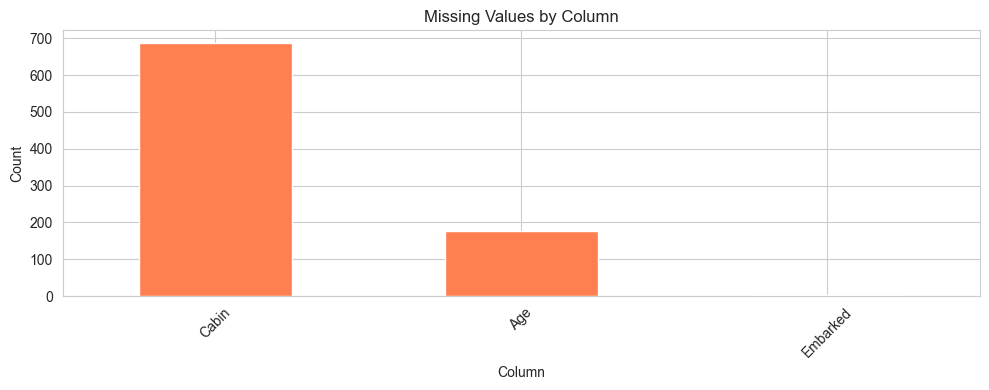

In [6]:
plt.figure(figsize=(10, 4))
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
missing_data.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xlabel('Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

print(f"Missing values after handling: {df.isnull().sum().sum()}")

Missing values after handling: 0


In [8]:
# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                         labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

print("New features created:")
print(df[['FamilySize', 'IsAlone', 'Title', 'AgeGroup']].head())

New features created:
   FamilySize  IsAlone Title AgeGroup
0           2        0    Mr    Adult
1           2        0   Mrs   Middle
2           1        1  Miss    Adult
3           2        0   Mrs    Adult
4           1        1    Mr    Adult


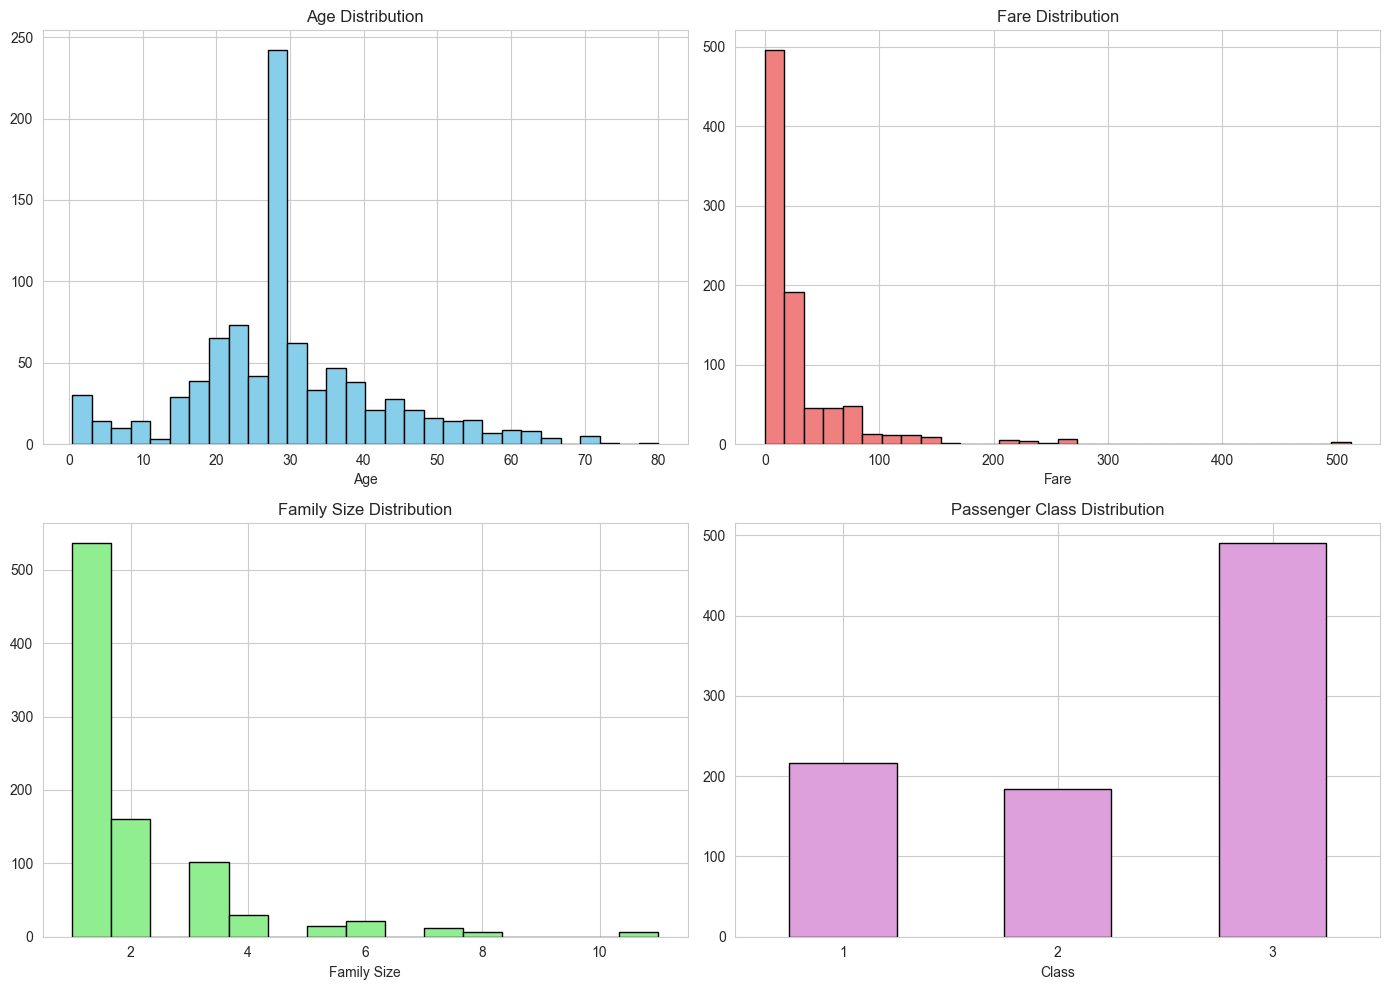

In [9]:
# 4.1 Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df['Age'].hist(bins=30, ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')

df['Fare'].hist(bins=30, ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Fare Distribution')
axes[0,1].set_xlabel('Fare')

df['FamilySize'].hist(bins=15, ax=axes[1,0], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Family Size Distribution')
axes[1,0].set_xlabel('Family Size')

df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='plum', edgecolor='black')
axes[1,1].set_title('Passenger Class Distribution')
axes[1,1].set_xlabel('Class')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

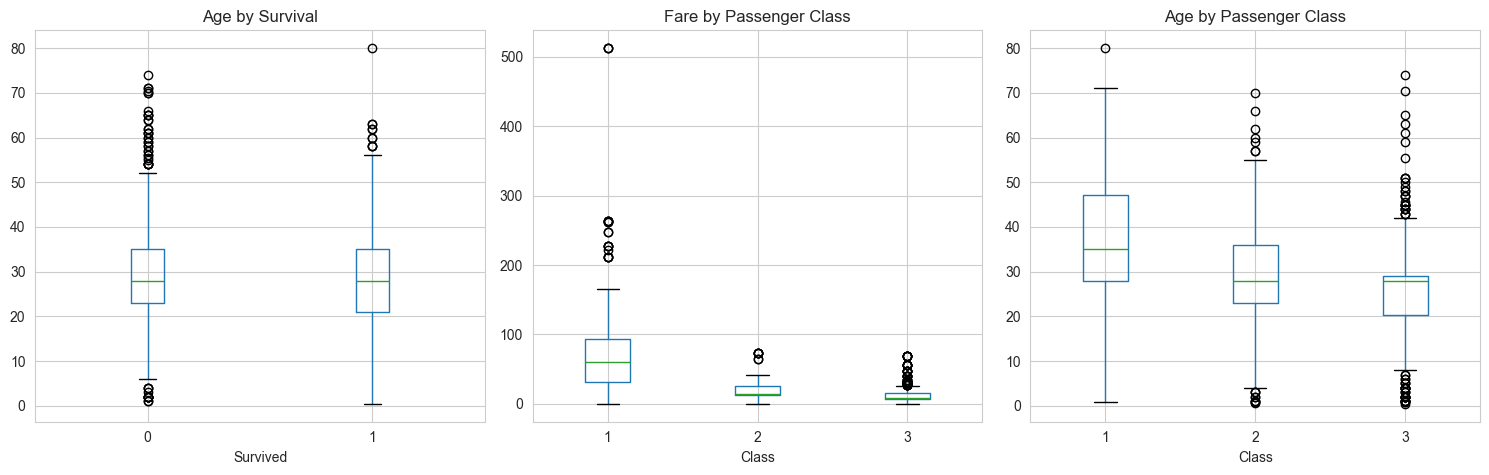

In [10]:
# 4.2 Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df.boxplot(column='Age', by='Survived', ax=axes[0])
axes[0].set_title('Age by Survival')
axes[0].set_xlabel('Survived')

df.boxplot(column='Fare', by='Pclass', ax=axes[1])
axes[1].set_title('Fare by Passenger Class')
axes[1].set_xlabel('Class')

df.boxplot(column='Age', by='Pclass', ax=axes[2])
axes[2].set_title('Age by Passenger Class')
axes[2].set_xlabel('Class')

plt.suptitle('')
plt.tight_layout()
plt.show()

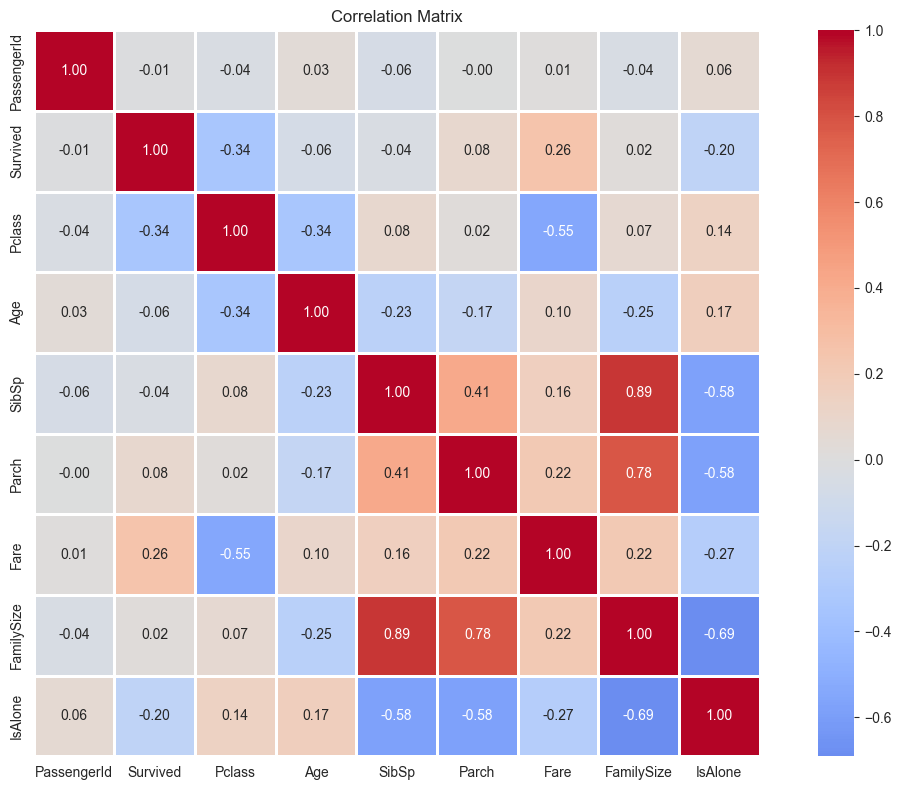

In [11]:
# 4.3 Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [12]:
survival_corr = correlation['Survived'].sort_values(ascending=False)
print("Correlation with Survival:")
print(survival_corr)

Correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


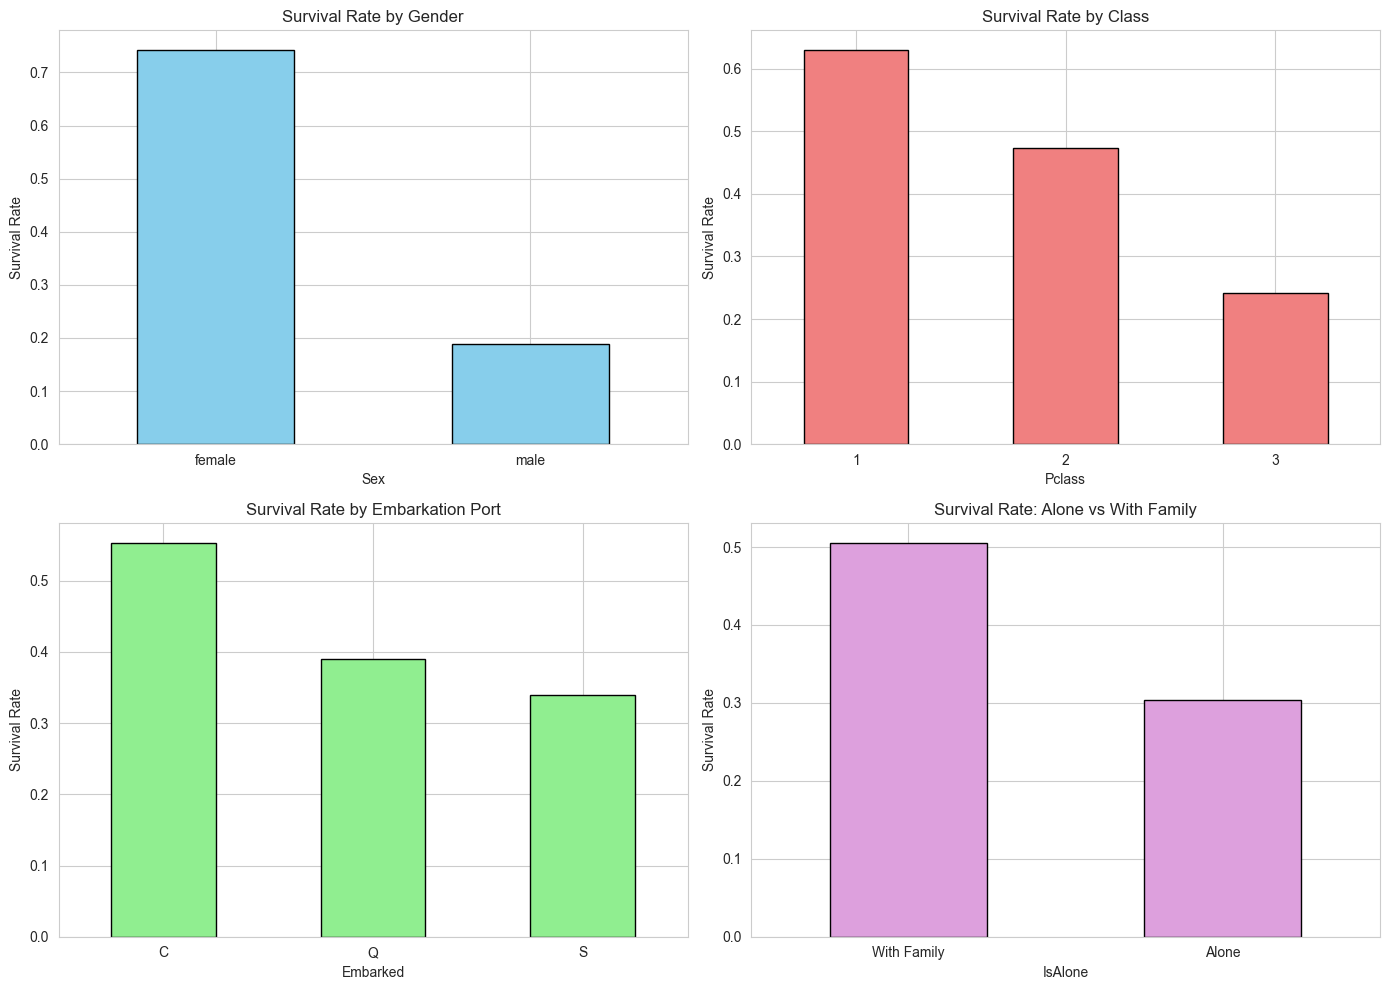

In [13]:
# 4.4 Survival Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Survival Rate by Gender')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=0)

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Survival Rate by Class')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=0)

df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[1,0], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Survival Rate by Embarkation Port')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)

df.groupby('IsAlone')['Survived'].mean().plot(kind='bar', ax=axes[1,1], color='plum', edgecolor='black')
axes[1,1].set_title('Survival Rate: Alone vs With Family')
axes[1,1].set_ylabel('Survival Rate')
axes[1,1].set_xticklabels(['With Family', 'Alone'], rotation=0)

plt.tight_layout()
plt.show()

In [14]:
print("TITANIC SURVIVAL ANALYSIS - KEY FINDINGS")
print("=" * 60)

print("\n1. Overall Survival Rate:")
survival_rate = df['Survived'].mean()
print(f"   {survival_rate:.1%} of passengers survived")

print("\n2. Gender Impact:")
gender_survival = df.groupby('Sex')['Survived'].mean()
for sex, rate in gender_survival.items():
    print(f"   {sex.capitalize()}: {rate:.1%}")

print("\n3. Class Impact:")
class_survival = df.groupby('Pclass')['Survived'].mean()
for pclass, rate in class_survival.items():
    print(f"   Class {pclass}: {rate:.1%}")

print("\n4. Age Statistics:")
print(f"   Average age: {df['Age'].mean():.1f} years")
print(f"   Survivors average age: {df[df['Survived']==1]['Age'].mean():.1f} years")
print(f"   Non-survivors average age: {df[df['Survived']==0]['Age'].mean():.1f} years")

print("\n5. Family Size Impact:")
family_survival = df.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False)
print(f"   Best survival rate for family size: {family_survival.index[0]}")
print(f"   Alone vs With Family:")
print(f"   - Traveling alone: {df[df['IsAlone']==1]['Survived'].mean():.1%}")
print(f"   - With family: {df[df['IsAlone']==0]['Survived'].mean():.1%}")

print("\n6. Fare Analysis:")
print(f"   Average fare (survived): ${df[df['Survived']==1]['Fare'].mean():.2f}")
print(f"   Average fare (not survived): ${df[df['Survived']==0]['Fare'].mean():.2f}")

print("\n" + "=" * 60)

TITANIC SURVIVAL ANALYSIS - KEY FINDINGS

1. Overall Survival Rate:
   38.4% of passengers survived

2. Gender Impact:
   Female: 74.2%
   Male: 18.9%

3. Class Impact:
   Class 1: 63.0%
   Class 2: 47.3%
   Class 3: 24.2%

4. Age Statistics:
   Average age: 29.4 years
   Survivors average age: 28.3 years
   Non-survivors average age: 30.0 years

5. Family Size Impact:
   Best survival rate for family size: 4
   Alone vs With Family:
   - Traveling alone: 30.4%
   - With family: 50.6%

6. Fare Analysis:
   Average fare (survived): $48.40
   Average fare (not survived): $22.12

